In [1]:
#Beschreibung: Analyse von Finanzdaten mit Python

In [2]:
#Import der Libraries

import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
portfolio = ["FB", "AAPL", "NFLX"]

In [4]:
start = "2018-01-01"
end = "2020-01-01"

In [5]:
FB = web.DataReader("FB", data_source="yahoo", start=start, end=end)

In [6]:
FB["Adj Close"]

Date
2018-01-02    181.419998
2018-01-03    184.669998
2018-01-04    184.330002
2018-01-05    186.850006
2018-01-08    188.279999
                 ...    
2019-12-24    205.119995
2019-12-26    207.789993
2019-12-27    208.100006
2019-12-30    204.410004
2019-12-31    205.250000
Name: Adj Close, Length: 503, dtype: float64

In [7]:
df = pd.DataFrame()

In [8]:
for asset in portfolio:
    df[asset] = web.DataReader(asset, data_source="yahoo", start=start, end=end)["Adj Close"]
    
df 

,FB,AAPL,NFLX
Date,,,
2018-01-02,181.419998,41.135754,201.070007
2018-01-03,184.669998,41.128590,205.050003
2018-01-04,184.330002,41.319633,205.630005
2018-01-05,186.850006,41.790062,209.990005
2018-01-08,188.279999,41.634850,212.050003
...,...,...,...
2019-12-24,205.119995,69.938202,333.200012
2019-12-26,207.789993,71.325806,332.630005
2019-12-27,208.100006,71.298744,329.089996


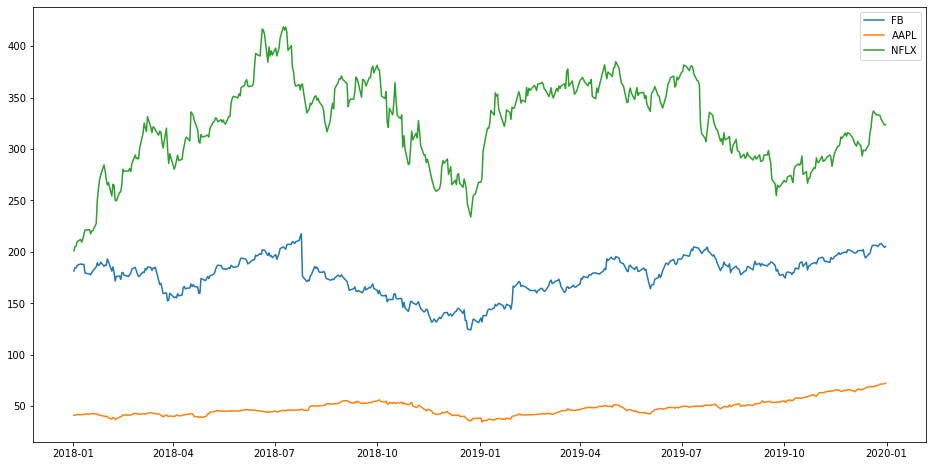

In [9]:
plt.figure(figsize=(16,8))
plt.plot(df);
plt.legend(df.columns.values)

In [10]:
df.pct_change().describe()

,FB,AAPL,NFLX
count,502.000000,502.000000,502.000000
mean,0.000471,0.001273,0.001278
std,0.021017,0.017341,0.025710
min,-0.189609,-0.099608,-0.102720
25%,-0.008989,-0.006521,-0.012773
50%,0.000976,0.001608,0.000598
75%,0.011516,0.010310,0.016836
max,0.108164,0.070422,0.099789


In [11]:
df.pct_change().corr()

,FB,AAPL,NFLX
FB,1.000000,0.455735,0.457141
AAPL,0.455735,1.000000,0.476121
NFLX,0.457141,0.476121,1.000000


In [12]:
df.pct_change().cov()*252 #252 Handelstage im Jahr(bankwesen)

,FB,AAPL,NFLX
FB,0.111311,0.041857,0.062248
AAPL,0.041857,0.075782,0.053494
NFLX,0.062248,0.053494,0.166576


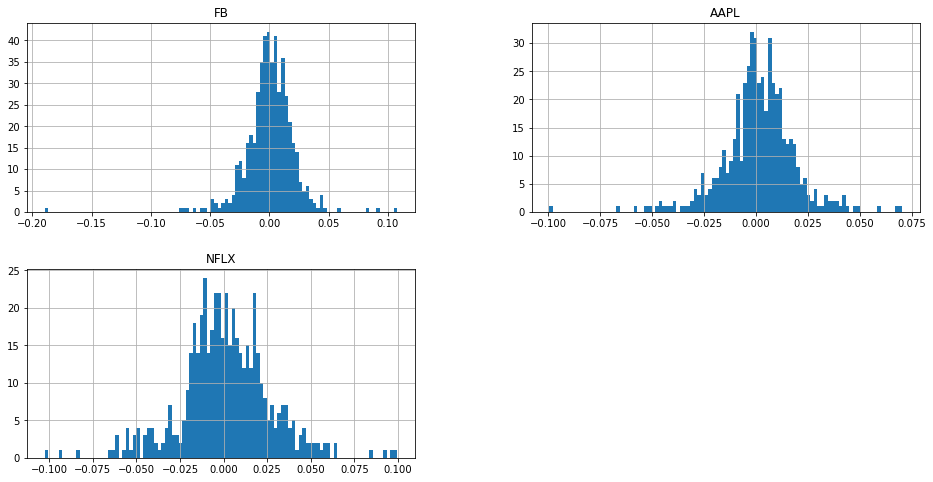

In [13]:
df.pct_change().hist(bins=100,figsize=(16,8));

In [14]:
return_annual = df.pct_change().mean()*252
return_annual

FB      0.118730
AAPL    0.320874
NFLX    0.322091
dtype: float64

In [15]:
cov_matrix_annual = df.pct_change().cov()*252
cov_matrix_annual

,FB,AAPL,NFLX
FB,0.111311,0.041857,0.062248
AAPL,0.041857,0.075782,0.053494
NFLX,0.062248,0.053494,0.166576


In [16]:
import numpy as np

In [17]:
weights = np.array([1/3, 1/3, 1/3])

In [18]:
portfolio_return = np.sum((return_annual*weights))
portfolio_return

0.25389833888144475

In [19]:
portfolio_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
portfolio_variance

0.07431854193726396

In [20]:
portfolio_volatility = np.sqrt(portfolio_variance)
portfolio_volatility

0.2726142731723047

In [21]:
new_portfolios = 10000

p_weights = []
p_return = []
p_vol = []
p_sharpe = []

for i in range(new_portfolios):
    weights = np.array(np.random.random(3))
    weights = weights / np.sum(weights)
    p_weights.append(weights)
    
    expected_return = np.sum((return_annual*weights))
    p_return.append(expected_return)
    
    expected_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_annual, weights)))
    p_vol.append(expected_volatility)
    
    sharpe = expected_return/expected_volatility
    p_sharpe.append(sharpe)



In [22]:
data = {"Returns": p_return, "Volatility" : p_vol, "Sharpe Ratio": p_sharpe}

In [23]:
 for counter, symbol in enumerate (df.columns.tolist()):
        data[symbol+" weight"] = [w[counter] for w in p_weights]

In [24]:
portfolios = pd.DataFrame(data)
portfolios

,Returns,Volatility,Sharpe Ratio,FB weight,AAPL weight,NFLX weight
0,0.240578,0.287981,0.835393,0.399650,0.197483,0.402867
1,0.237940,0.269018,0.884477,0.411866,0.323341,0.264793
2,0.236250,0.278575,0.848066,0.420631,0.247010,0.332359
3,0.287894,0.293669,0.980335,0.166175,0.331613,0.502212
4,0.304140,0.261465,1.163214,0.083798,0.747159,0.169042
...,...,...,...,...,...,...
9995,0.241940,0.259490,0.932371,0.391548,0.431349,0.177103
9996,0.247219,0.280458,0.881484,0.366613,0.260672,0.372715
9997,0.235068,0.267321,0.879350,0.425923,0.334100,0.239976
9998,0.286814,0.291701,0.983246,0.171450,0.337867,0.490683


In [26]:
portfolios["Returns"].argmax()

5079

In [27]:
portfolios.loc[[5079]]

,Returns,Volatility,Sharpe Ratio,FB weight,AAPL weight,NFLX weight
5079,0.32201,0.401494,0.80203,0.000256,0.023894,0.97585


In [28]:
portfolios["Sharpe Ratio"].argmax()

9230

In [29]:
portfolios.loc[[9230]]

,Returns,Volatility,Sharpe Ratio,FB weight,AAPL weight,NFLX weight
9230,0.320895,0.268659,1.194432,0.001067,0.804509,0.194424


In [31]:
portfolios.loc[[portfolios["Volatility"].argmax()]]

,Returns,Volatility,Sharpe Ratio,FB weight,AAPL weight,NFLX weight
3099,0.321571,0.406835,0.790422,0.002543,0.002361,0.995095


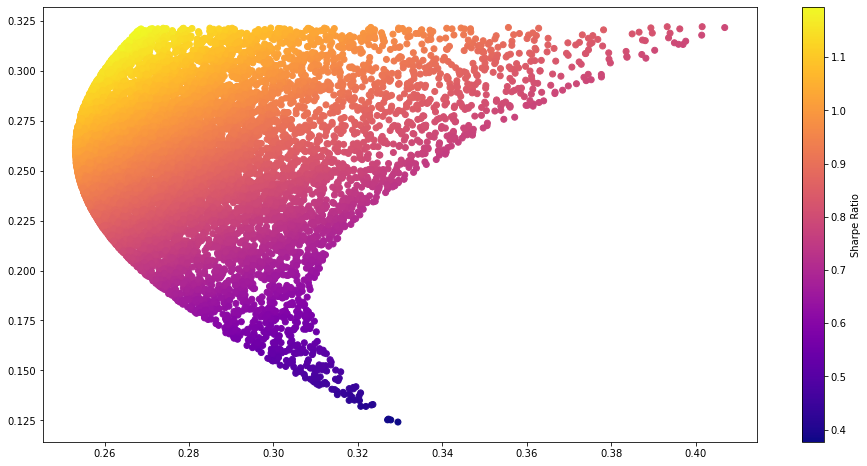

In [37]:
plt.figure(figsize=(16,8))
plt.scatter(portfolios["Volatility"], portfolios["Returns"], c=portfolios["Sharpe Ratio"], cmap="plasma")
plt.colorbar(label="Sharpe Ratio");

#efficient frontier